In [1]:
pip install pyreadr

Note: you may need to restart the kernel to use updated packages.


In [2]:
#import important liberies
import pandas as pd
import pyreadr
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np

from sklearn.preprocessing import StandardScaler, LabelEncoder

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Prepare Data

## Extract Data

Converting .rData into dataframe

In [3]:
result = pyreadr.read_r("/kaggle/input/tennessee-eastman-process-simulation-dataset/TEP_FaultFree_Training.RData")
result1 = pyreadr.read_r("/kaggle/input/tennessee-eastman-process-simulation-dataset/TEP_Faulty_Training.RData")
result2 = pyreadr.read_r("/kaggle/input/tennessee-eastman-process-simulation-dataset/TEP_FaultFree_Testing.RData")
result3 = pyreadr.read_r("/kaggle/input/tennessee-eastman-process-simulation-dataset/TEP_Faulty_Testing.RData")

**pyreadr** converts rData into dictionary type object.

In [4]:
df_ff = result['fault_free_training']
df = result1['faulty_training']
df_test = result2['fault_free_testing']
df_test_ff = result3['faulty_testing']

In [ ]:
# print(df.isnull().sum())
# print(df_ff.isnull().sum())
# print(df_test_ff.isnull().sum())
# print(df_test_ff.isnull().sum())

## Transform Data

In [5]:
df = pd.concat([df,df_ff])
dft = pd.concat([df_test,df_test_ff])

In [9]:
print("len df:",len(df))
print("len dft:",len(dft))
df.head()

len df: 5250000
len dft: 10080000


faultNumber  simulationRun  sample  xmeas_1  xmeas_2  xmeas_3  xmeas_4  \
0          1.0            1.0       1  0.25038   3674.0   4529.0   9.2320   
1          1.0            1.0       2  0.25109   3659.4   4556.6   9.4264   
2          1.0            1.0       3  0.25038   3660.3   4477.8   9.4426   
3          1.0            1.0       4  0.24977   3661.3   4512.1   9.4776   
4          1.0            1.0       5  0.29405   3679.0   4497.0   9.3381   

   xmeas_5  xmeas_6  xmeas_7  ...   xmv_2   xmv_3   xmv_4   xmv_5   xmv_6  \
0   26.889   42.402   2704.3  ...  53.744  24.657  62.544  22.137  39.935   
1   26.721   42.576   2705.0  ...  53.414  24.588  59.259  22.084  40.176   
2   26.875   42.070   2706.2  ...  54.357  24.666  61.275  22.380  40.244   
3   26.758   42.063   2707.2  ...  53.946  24.725  59.856  22.277  40.257   
4   26.889   42.650   2705.1  ...  53.658  28.797  60.717  21.947  39.144   

    xmv_7   xmv_8   xmv_9  xmv_10  xmv_11  
0  42.323  47.757  47.510  41.258  18.447  
1  38.554  43.692  47.427  41.359  17.194  
2  38.990  46.699  47.468  41.199  20.530  
3  38.072  47.541  47.658  41.643  18.089  
4  41.955  47.645  47.346  41.507  18.461  

[5 rows x 55 columns]

### About data

The TEP is comprised of 8 chemical components in total: 4 reactants, 2 products, 1 by-product and 1 inert component. These components undergo a chemical process dominated by 5 main process units: a reactor that allows for the reaction of the gaseous feed components (A, C, D and E) into liquid products (G and H), a condenser to cool-down the gaseous product stream coming out of the reactor, a gas-liquid separator to split gas and liquid components from the cooled product stream, a centrifugal compressor to flow this gas stream back into the reactor and a stripper to handle the efficient separation of the 2 products from any unreacted feed components. There is also a purge to remove the inert (B) and the by-product (F) from the system . An overview of the industrial process is given below.

![TEP_Flow](https://www.ieee-dataport.org/sites/default/files/TE_flow.jpg)



In [10]:
X_dict = {
'XMEAS_1':'A_feed_stream',
'XMEAS_2':'D_feed_stream',
'XMEAS_3':'E_feed_stream',
'XMEAS_4':'Total_fresh_feed_stripper',
'XMEAS_5':'Recycle_flow_into_rxtr',
'XMEAS_6':'Reactor_feed_rate',
'XMEAS_7':'Reactor_pressure',
'XMEAS_8':'Reactor_level',
'XMEAS_9':'Reactor_temp',
'XMEAS_10':'Purge_rate',
'XMEAS_11':'Separator_temp',
'XMEAS_12':'Separator_level',
'XMEAS_13':'Separator_pressure',
'XMEAS_14':'Separator_underflow',
'XMEAS_15':'Stripper_level',
'XMEAS_16':'Stripper_pressure',
'XMEAS_17':'Stripper_underflow',
'XMEAS_18':'Stripper_temperature',
'XMEAS_19':'Stripper_steam_flow',
'XMEAS_20':'Compressor_work',
'XMEAS_21':'Reactor_cooling_water_outlet_temp',
'XMEAS_22':'Condenser_cooling_water_outlet_temp',
'XMEAS_23':'Composition_of_A_rxtr_feed',
'XMEAS_24':'Composition_of_B_rxtr_feed',
'XMEAS_25':'Composition_of_C_rxtr_feed',
'XMEAS_26':'Composition_of_D_rxtr_feed',
'XMEAS_27':'Composition_of_E_rxtr_feed',
'XMEAS_28':'Composition_of_F_rxtr_feed',
'XMEAS_29':'Composition_of_A_purge',
'XMEAS_30':'Composition_of_B_purge',
'XMEAS_31':'Composition_of_C_purge',
'XMEAS_32':'Composition_of_D_purge',
'XMEAS_33':'Composition_of_E_purge',
'XMEAS_34':'Composition_of_F_purge',
'XMEAS_35':'Composition_of_G_purge',
'XMEAS_36':'Composition_of_H_purge',
'XMEAS_37':'Composition_of_D_product',
'XMEAS_38':'Composition_of_E_product',
'XMEAS_39':'Composition_of_F_product',
'XMEAS_40':'Composition_of_G_product',
'XMEAS_41':'Composition_of_H_product',
'XMV_1':'D_feed_flow_valve',
'XMV_2':'E_feed_flow_valve',
'XMV_3':'A_feed_flow_valve',
'XMV_4':'Total_feed_flow_stripper_valve',
'XMV_5':'Compressor_recycle_valve',
'XMV_6':'Purge_valve',
'XMV_7':'Separator_pot_liquid_flow_valve',
'XMV_8':'Stripper_liquid_product_flow_valve',
'XMV_9':'Stripper_steam_valve',
'XMV_10':'Reactor_cooling_water_flow_valve',
'XMV_11':'Condenser_cooling_water_flow_valve',
'XMV_12':'Agitator_speed'
}
# df = df.rename(columns = lambda x:X_dict[x.upper()] if x.upper() in X_dict.keys()  else x)
# dft = dft.rename(columns = lambda x:X_dict[x.upper()] if x.upper() in X_dict.keys()  else x)

## Explore: EDA

The TEP variables (columns 4 to 55) were sampled every 3 minutes for a total duration of 25 hours and 48 hours respectively.
The faults were introduced 1 hour into the Faulty Training
and 8 hours into Faulty Testing datasets

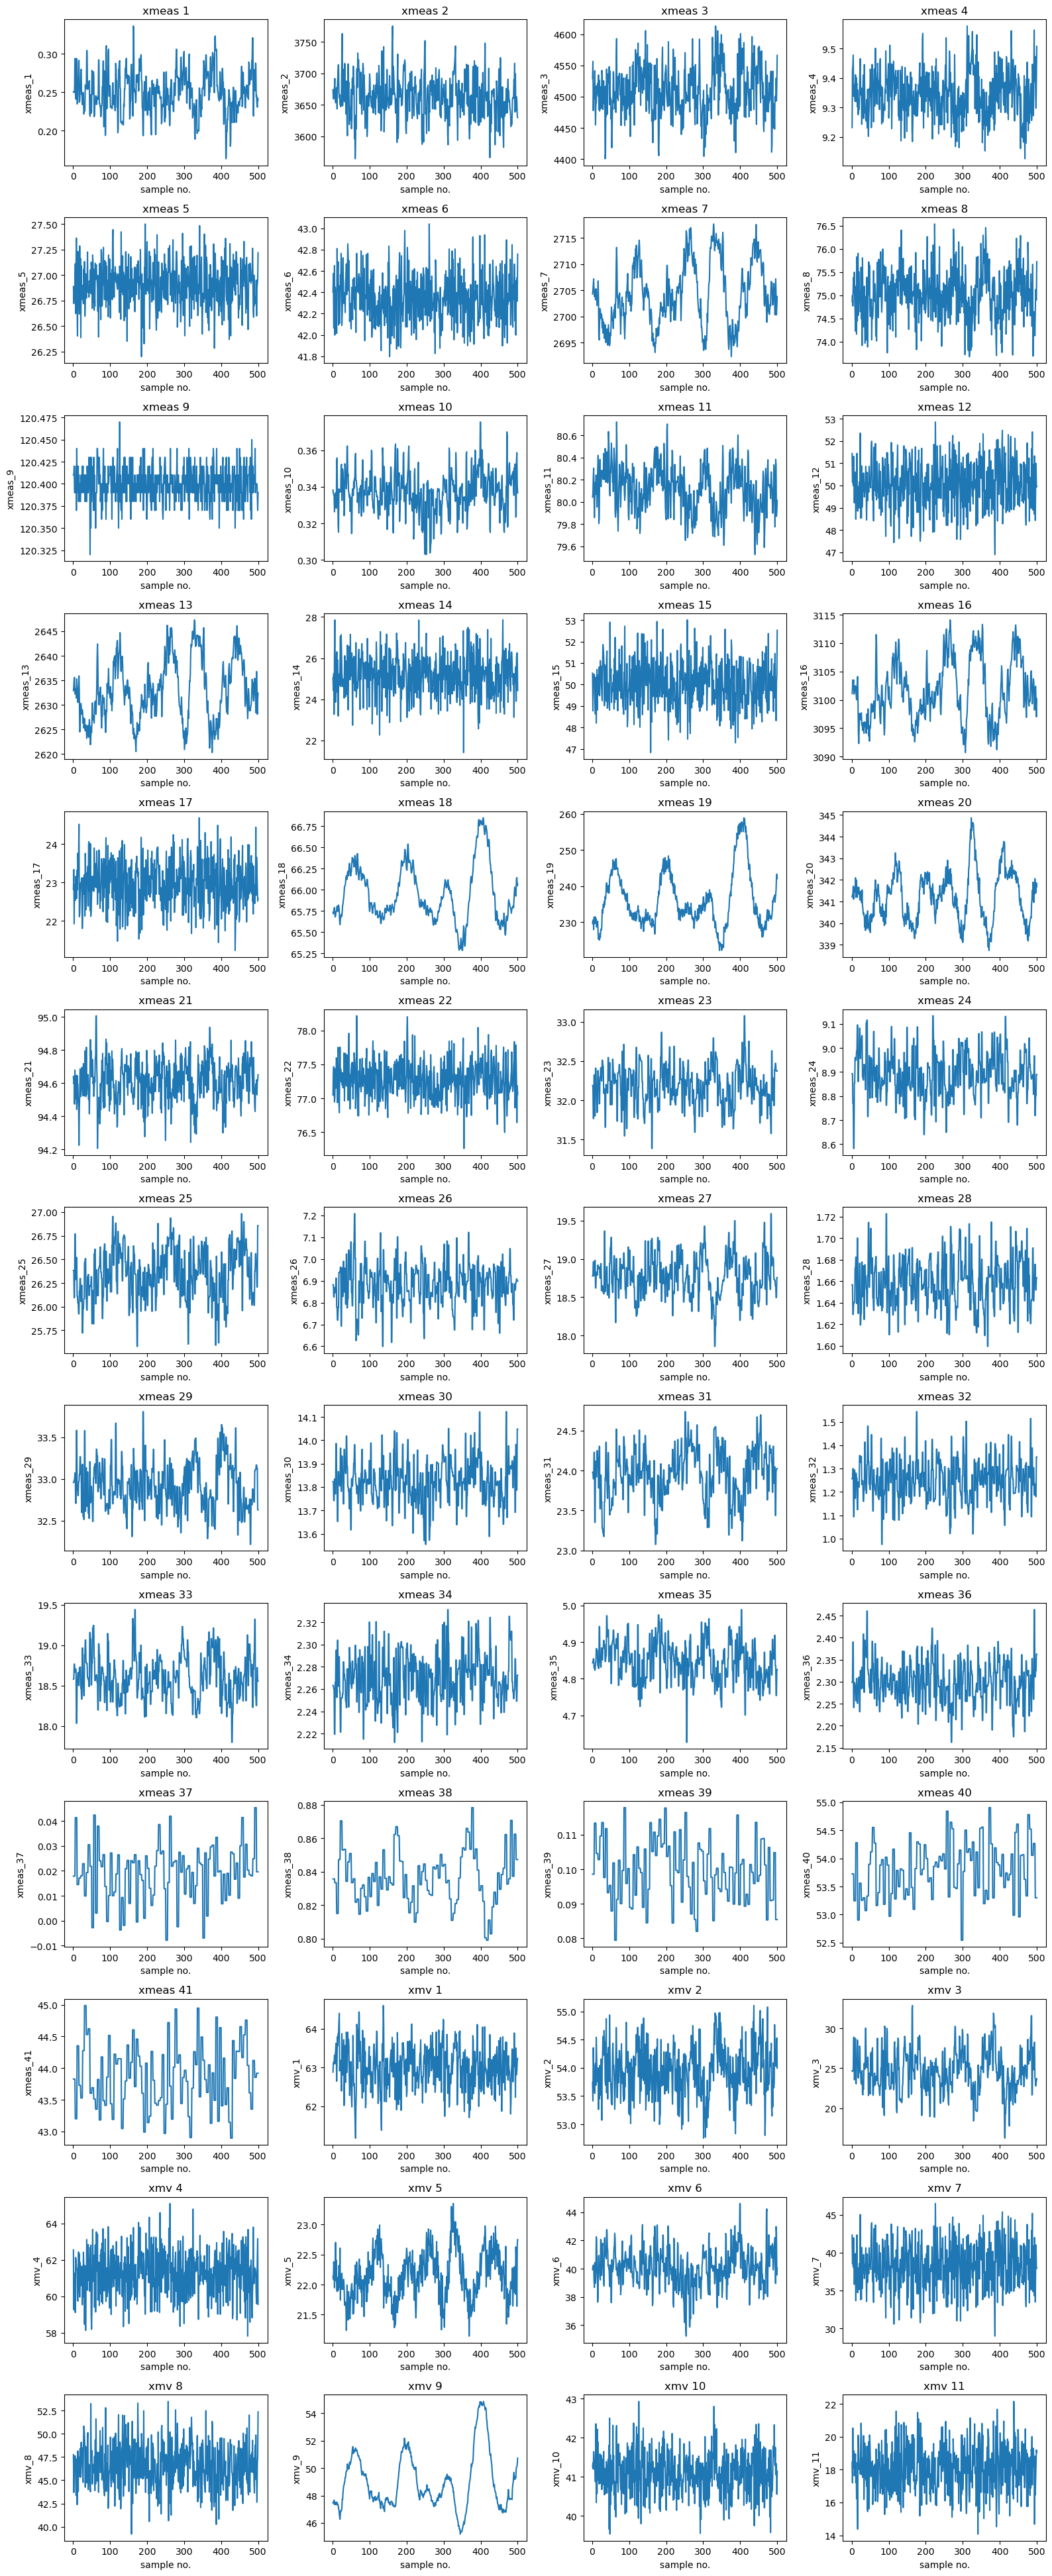

In [11]:
pp= df[(df['faultNumber']==0) & (df['simulationRun']==1)]
feature_columns = df.columns[3:]
num_features = len(feature_columns)
num_cols = min(4, num_features)  # Maximum of 4 columns
num_rows = int(np.ceil(num_features / num_cols))

fig, axes = plt.subplots(num_rows, num_cols, figsize=(4 * num_cols, 3 * num_rows))

for i, col in enumerate(feature_columns):
    row_index = i // num_cols
    col_index = i % num_cols
    ax = axes[row_index, col_index]

    ax.plot(pp['sample'], pp[col])
    ax.set_xlabel('sample no.')
    ax.set_ylabel(col)
    ax.set_title(col.replace("_"," "))

for i in range(num_features, num_rows * num_cols):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()


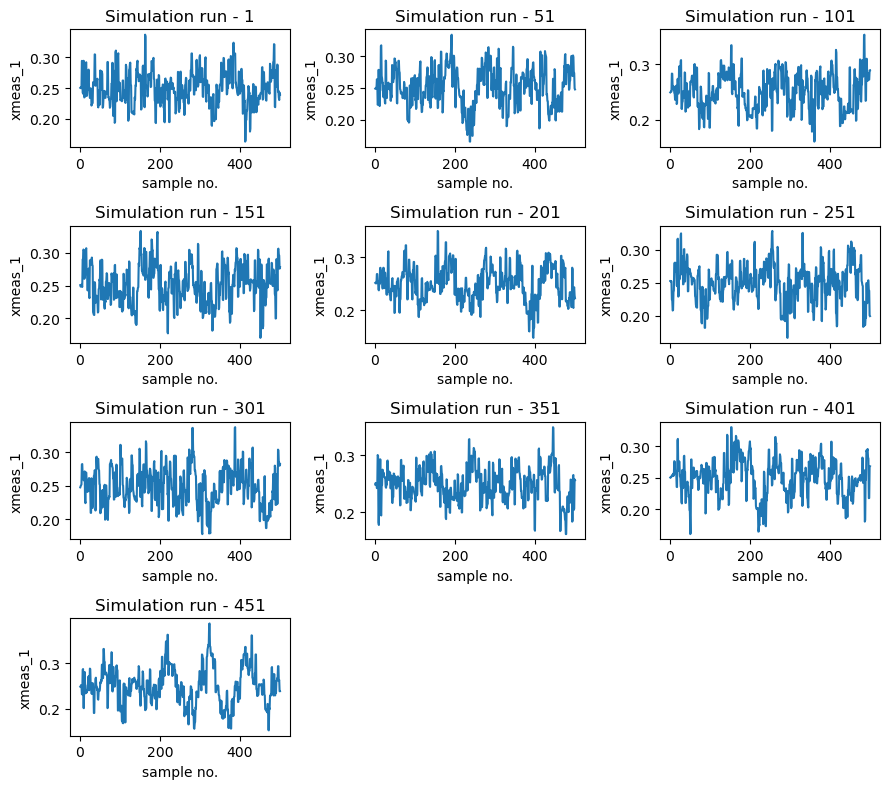

In [12]:
# col = 'A_feed_stream'
col = 'xmeas_1'
simRuns = np.arange(1, 500, 50)
num_simRuns = len(simRuns)
num_cols = min(3, num_simRuns)  # Maximum of 2 columns
num_rows = int(np.ceil(num_simRuns / num_cols))

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(3 * num_cols, 2
                                                      * num_rows))

for i, simRun in enumerate(simRuns):
    pp = df[(df['faultNumber'] == 0) & (df['simulationRun'] == simRun)]
    row_index = i // num_cols
    col_index = i % num_cols
    ax = axes[row_index, col_index]
    ax.plot(pp['sample'], pp[col])
    ax.set_xlabel('sample no.')
    ax.set_ylabel(col)
    ax.set_title(f'Simulation run - {simRun}')

# Remove any empty subplots
for i in range(num_simRuns, num_rows * num_cols):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()

plt.show()


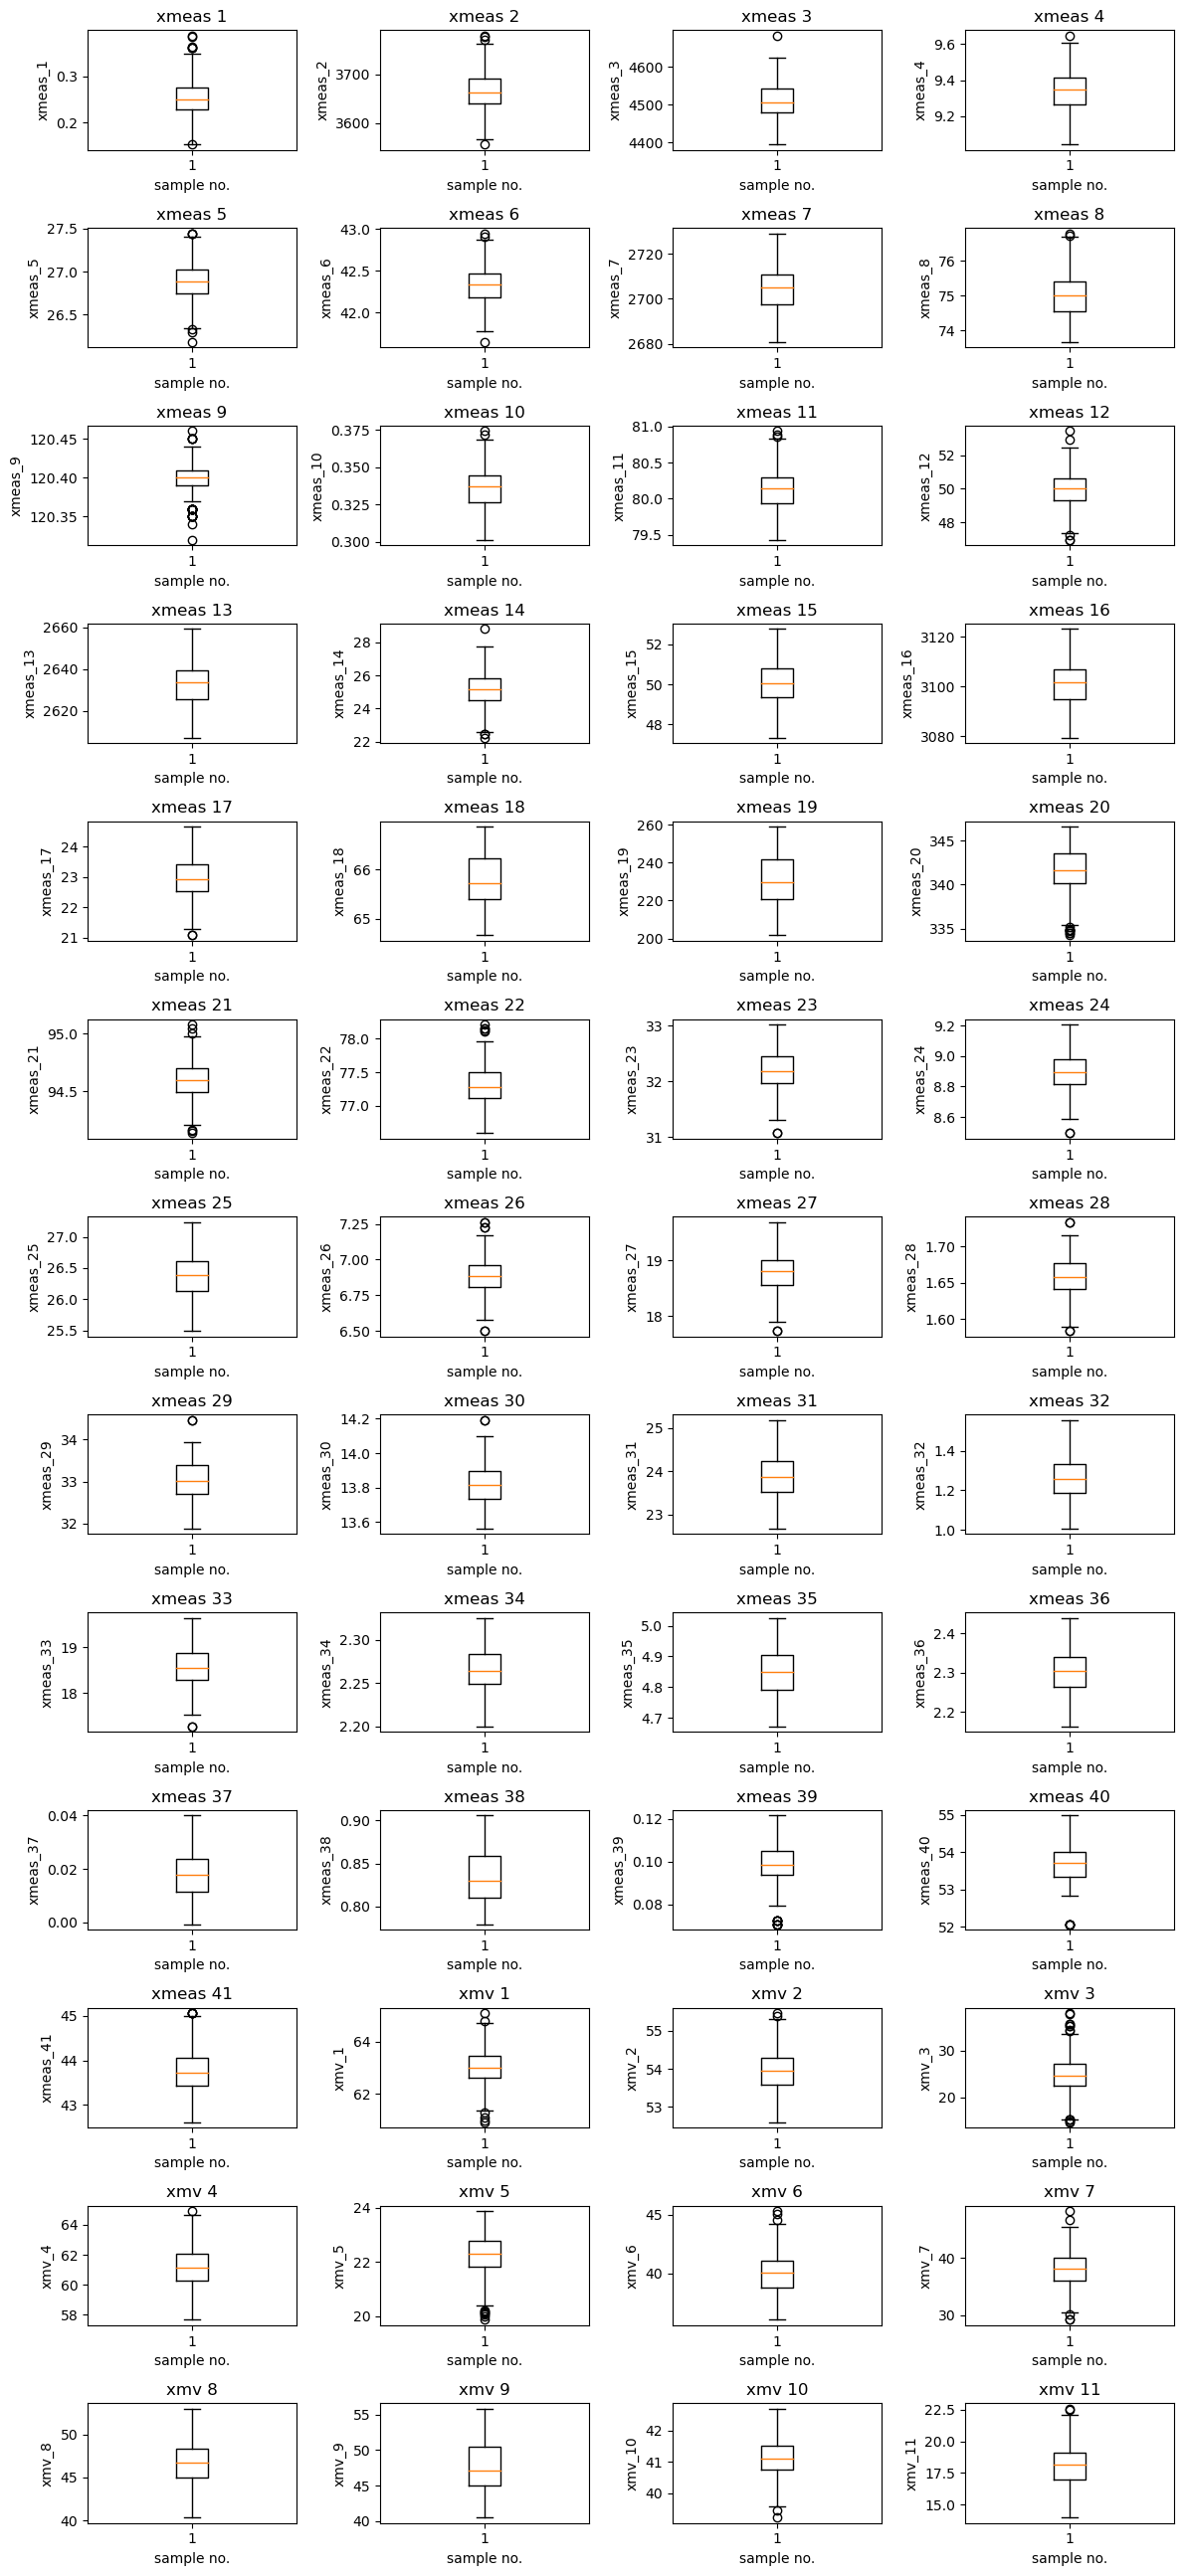

In [13]:
feature_columns = df.columns[3:]
num_features = len(feature_columns)
num_cols = min(4, num_features)  # Maximum of 4 columns
num_rows = int(np.ceil(num_features / num_cols))

fig, axes = plt.subplots(num_rows, num_cols, figsize=(3 * num_cols, 2* num_rows))

for i, col in enumerate(feature_columns):
    row_index = i // num_cols
    col_index = i % num_cols
    ax = axes[row_index, col_index]
    ax.boxplot(pp[col])
    ax.set_xlabel('sample no.')
    ax.set_ylabel(col)
    ax.set_title(col.replace("_"," "))

for i in range(num_features, num_rows * num_cols):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()


In [16]:
df.iloc[:,3:].describe()

xmeas_1       xmeas_2       xmeas_3       xmeas_4       xmeas_5  \
count  5.250000e+06  5.250000e+06  5.250000e+06  5.250000e+06  5.250000e+06   
mean   2.608409e-01  3.663777e+03  4.506178e+03  9.369238e+00  2.690159e+01   
std    1.461083e-01  4.277760e+01  1.086998e+02  3.563536e-01  2.310677e-01   
min   -4.735000e-03  3.327400e+03  3.540700e+03  6.639900e+00  2.538600e+01   
25%    2.191800e-01  3.636800e+03  4.470000e+03  9.266000e+00  2.676000e+01   
50%    2.510900e-01  3.663300e+03  4.508500e+03  9.354600e+00  2.690100e+01   
75%    2.823600e-01  3.690100e+03  4.547100e+03  9.452500e+00  2.704300e+01   
max    1.017500e+00  3.906700e+03  5.175800e+03  1.224000e+01  2.848600e+01   

            xmeas_6       xmeas_7       xmeas_8       xmeas_9      xmeas_10  \
count  5.250000e+06  5.250000e+06  5.250000e+06  5.250000e+06  5.250000e+06   
mean   4.236293e+01  2.722150e+03  7.488799e+01  1.204002e+02  3.459646e-01   
std    3.132701e-01  7.427919e+01  1.315495e+00  7.127389e-02  8.397854e-02   
min    3.965600e+01  2.413800e+03  6.187300e+01  1.196300e+02  1.839600e-02   
25%    4.218200e+01  2.697800e+03  7.444200e+01  1.203800e+02  3.234700e-01   
50%    4.234800e+01  2.705600e+03  7.495500e+01  1.204000e+02  3.363500e-01   
75%    4.252200e+01  2.714500e+03  7.543700e+01  1.204200e+02  3.484600e-01   
max    4.465300e+01  3.000500e+03  8.701700e+01  1.210100e+02  8.207300e-01   

       ...         xmv_2         xmv_3         xmv_4         xmv_5  \
count  ...  5.250000e+06  5.250000e+06  5.250000e+06  5.250000e+06   
mean   ...  5.430117e+01  3.015595e+01  6.315545e+01  2.291970e+01   
std    ...  5.132918e+00  2.003898e+01  7.238756e+00  1.081725e+01   
min    ...  3.118400e+01 -2.718600e-01 -4.893100e-03 -9.941000e-02   
25%    ...  5.350800e+01  2.230300e+01  6.032300e+01  2.146100e+01   
50%    ...  5.397000e+01  2.517600e+01  6.148600e+01  2.213500e+01   
75%    ...  5.443200e+01  2.862500e+01  6.279000e+01  2.272400e+01   
max    ...  1.000000e+02  1.001900e+02  1.000200e+02  1.001100e+02   

              xmv_6         xmv_7         xmv_8         xmv_9        xmv_10  \
count  5.250000e+06  5.250000e+06  5.250000e+06  5.250000e+06  5.250000e+06   
mean   3.992928e+01  3.807390e+01  4.644203e+01  5.047991e+01  4.190826e+01   
std    1.262621e+01  2.949913e+00  2.358218e+00  1.719376e+01  9.773339e+00   
min    0.000000e+00  2.280100e+01  3.492300e+01 -3.635500e-01 -2.809500e-01   
25%    3.836600e+01  3.605000e+01  4.488100e+01  4.554300e+01  4.058800e+01   
50%    3.997300e+01  3.814700e+01  4.634900e+01  4.804800e+01  4.119800e+01   
75%    4.147700e+01  3.999700e+01  4.803700e+01  5.166200e+01  4.190600e+01   
max    9.752800e+01  5.312100e+01  5.998000e+01  1.005200e+02  1.003200e+02   

             xmv_11  
count  5.250000e+06  
mean   1.880923e+01  
std    5.064388e+00  
min   -5.327000e-03  
25%    1.714200e+01  
50%    1.828500e+01  
75%    1.951200e+01  
max    1.000100e+02  

[8 rows x 52 columns]

In [ ]:
# ls_low_variance_feature

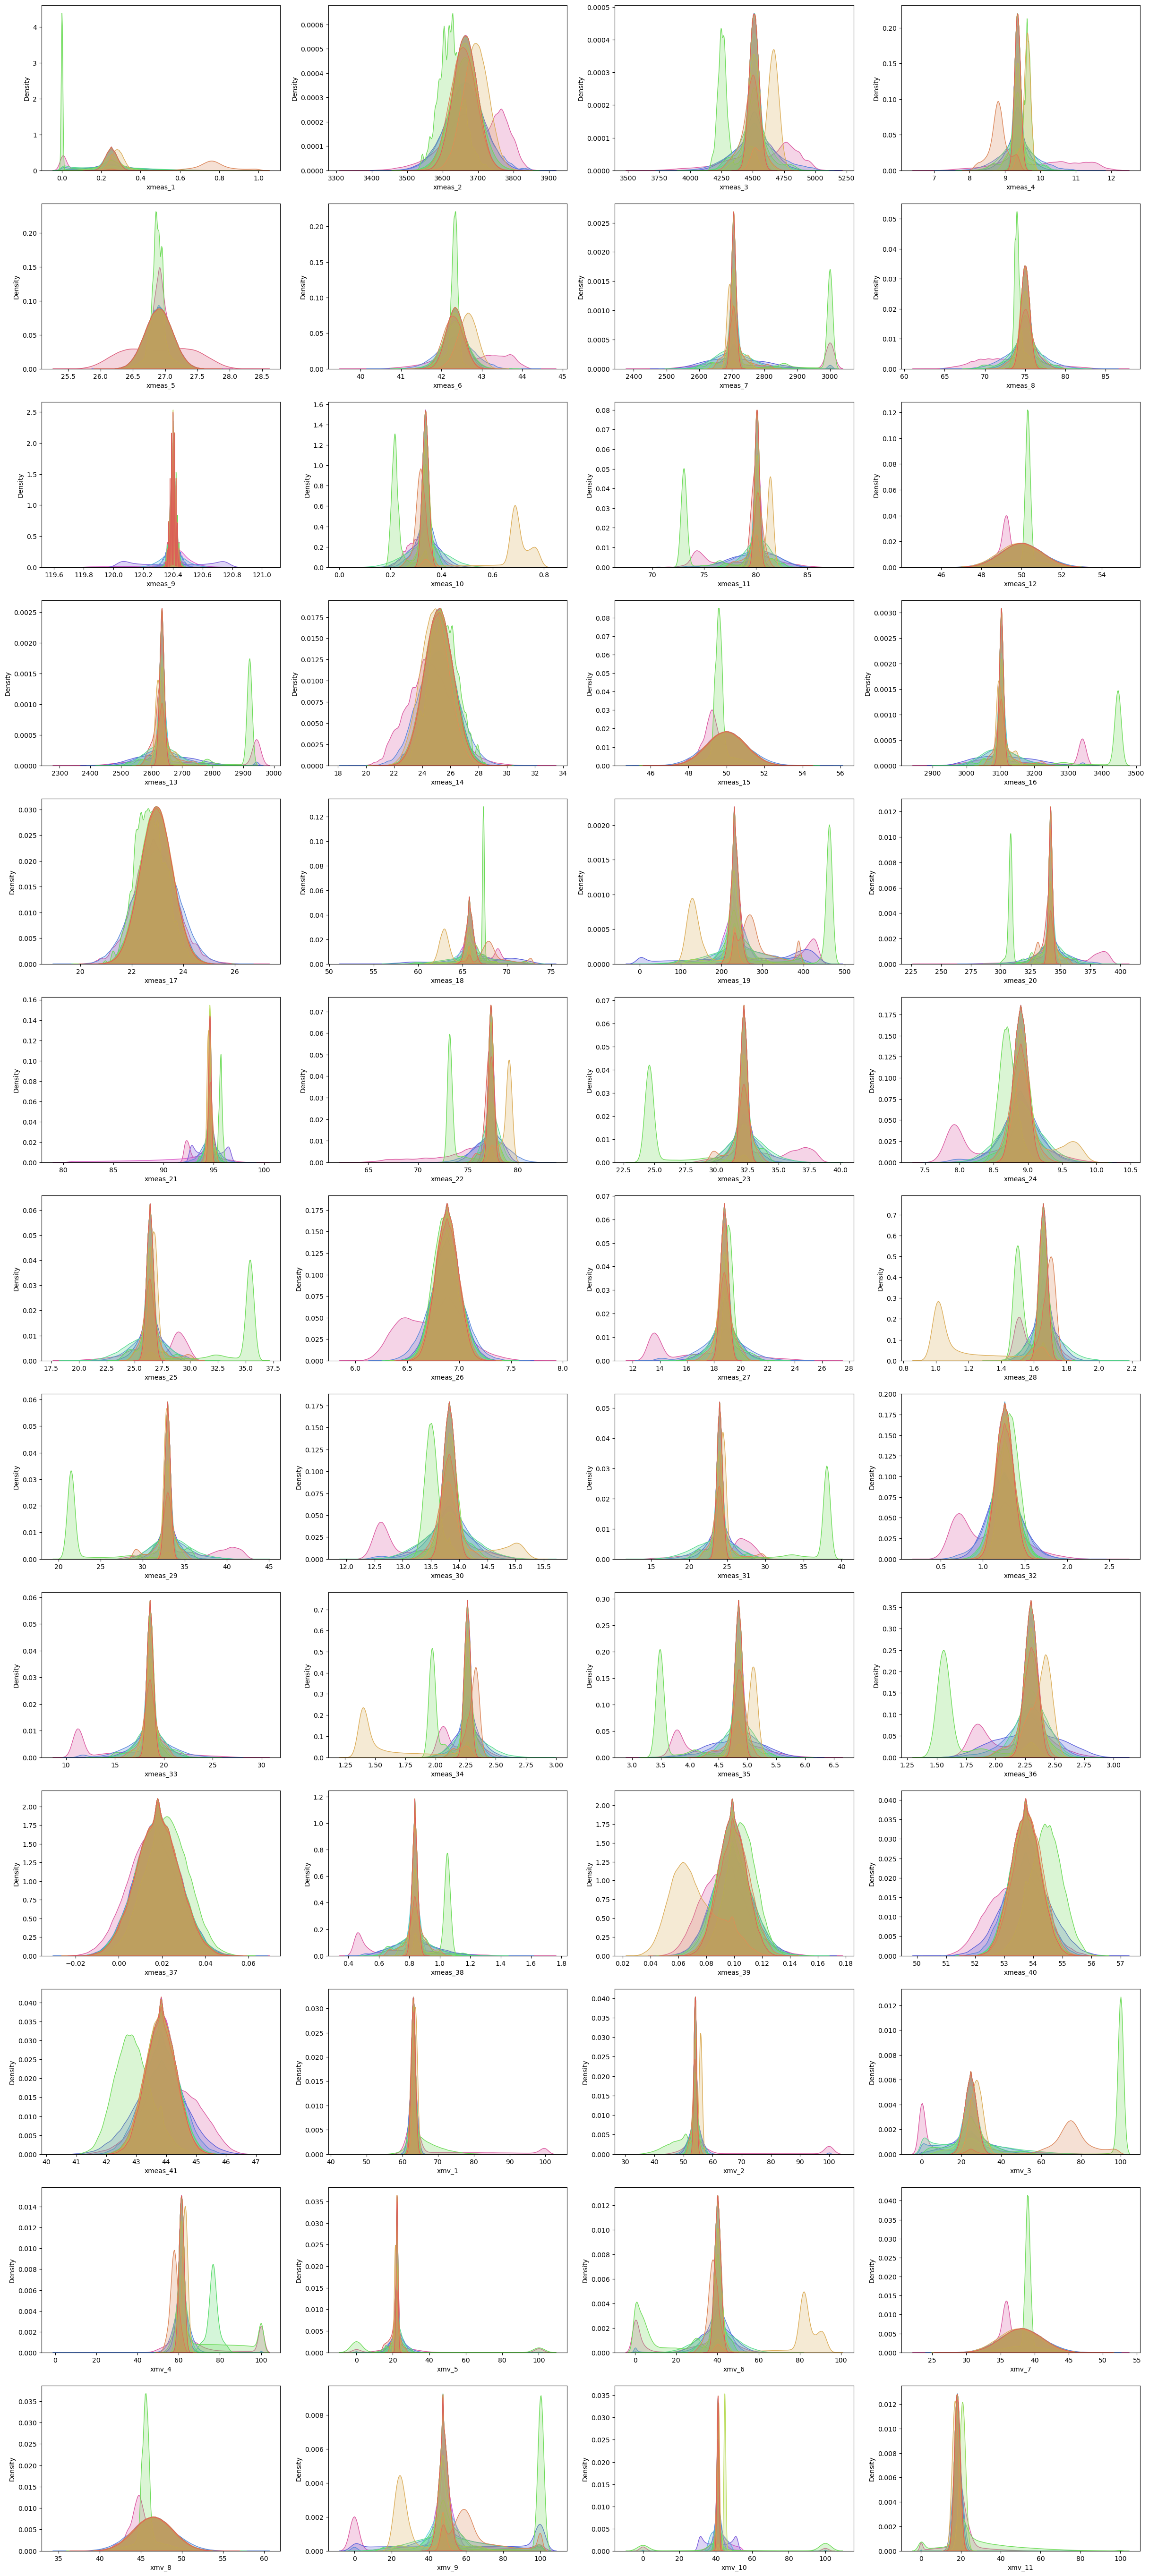

In [17]:
fig, ax = plt.subplots(13,4,figsize=(30,70))
for i,column in enumerate(df.columns[3:]):   #select all the feature columns to plot
    sns.kdeplot(data=df, x=column, hue="faultNumber",palette="hls",ax=ax.ravel()[i],fill=True, legend=False)

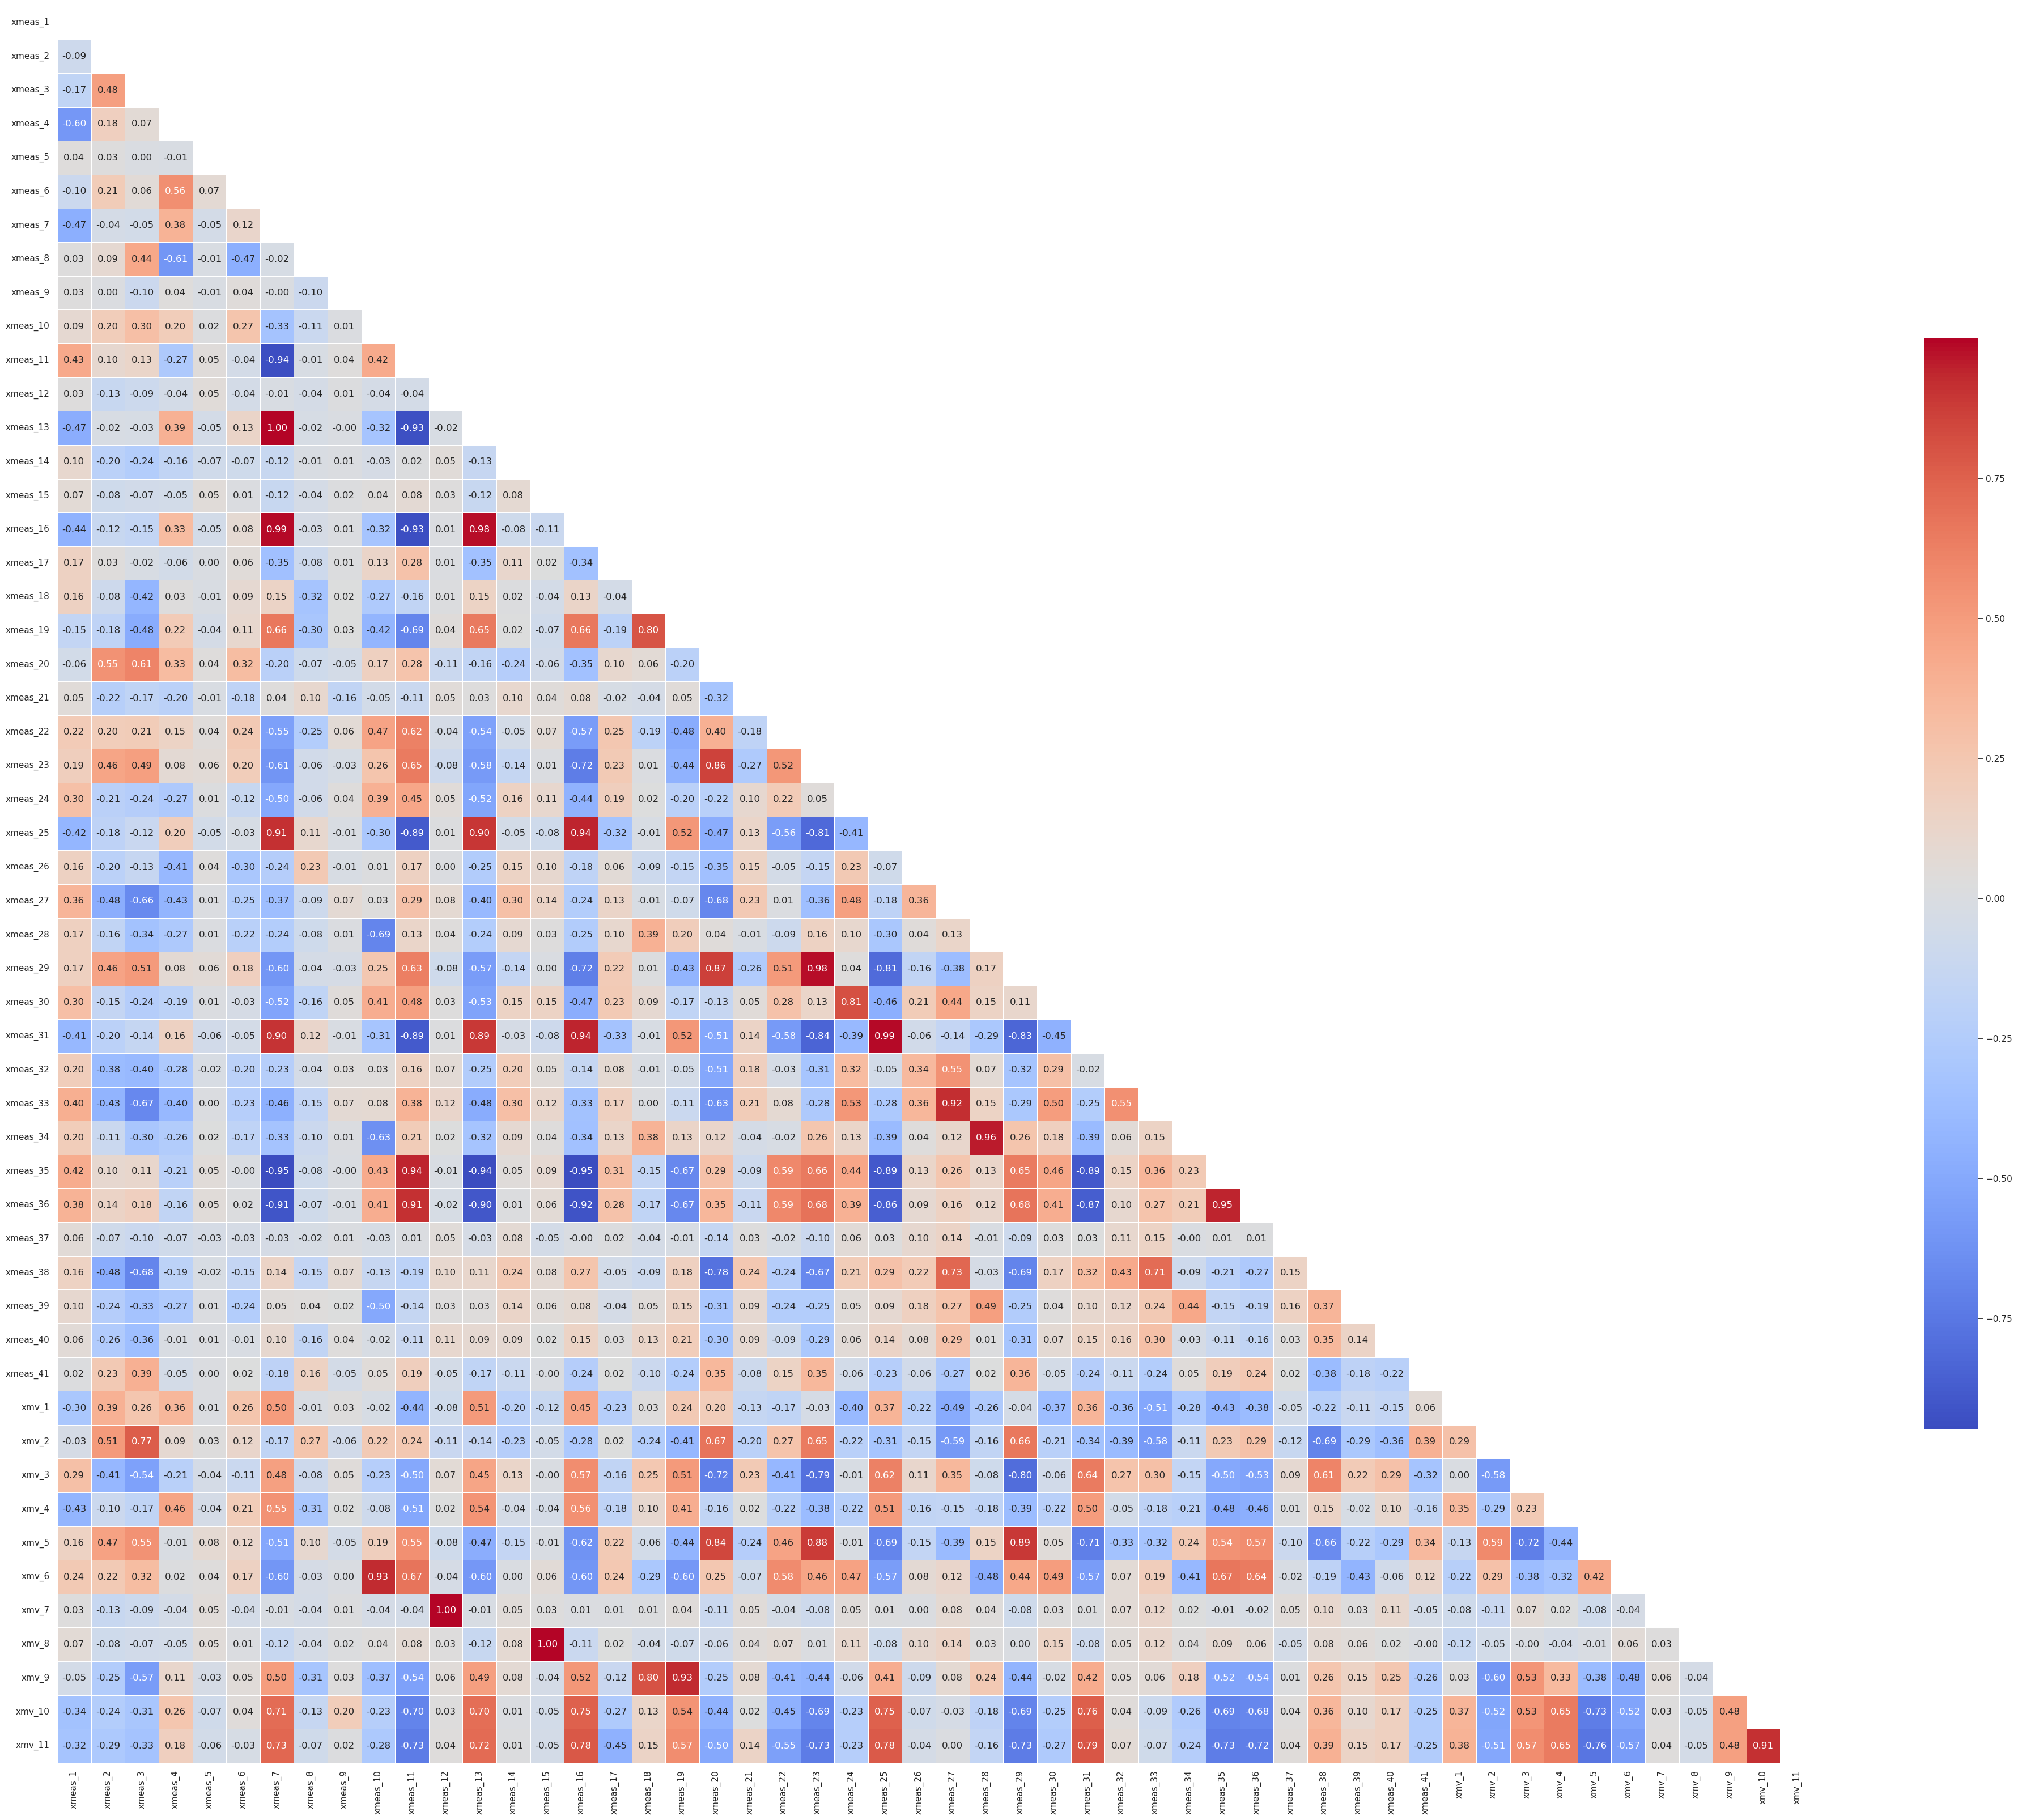

In [18]:
# Load the data into a pandas DataFrame
data = df[df['simulationRun']==1].iloc[:,3:]

# Calculate the correlation matrix
corr = data.corr()

# Create a heatmap with annotations
sns.set(style='white')
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(50, 50))
sns.heatmap(corr, mask=mask, cmap='coolwarm', annot=True, fmt='.2f',
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

In [19]:
corr_matrix = data.corr()
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.90)]
print("No. of Columns to drop",len(to_drop))
to_drop

No. of Columns to drop 14


['xmeas_13',
 'xmeas_16',
 'xmeas_25',
 'xmeas_29',
 'xmeas_31',
 'xmeas_33',
 'xmeas_34',
 'xmeas_35',
 'xmeas_36',
 'xmv_6',
 'xmv_7',
 'xmv_8',
 'xmv_9',
 'xmv_11']

In [6]:
to_drop = ['xmeas_13',
 'xmeas_16',
 'xmeas_25',
 'xmeas_29',
 'xmeas_31',
 'xmeas_33',
 'xmeas_34',
 'xmeas_35',
 'xmeas_36',
 'xmv_6',
 'xmv_7',
 'xmv_8',
 'xmv_9',
 'xmv_11']

# Supervised ML Approach


In [44]:
def wrangle(df,drop,simulation):
    reduced_data =df[(df['simulationRun'] >simulation[0] ) & (df['simulationRun'] <simulation[1] ) & (df['sample']>20)]
    if drop != None:
        reduced_data = reduced_data.drop(columns=to_drop, axis=1)
    reduced_data = reduced_data[reduced_data['faultNumber'] != 3]
    reduced_data = reduced_data[reduced_data['faultNumber'] != 9]
    reduced_data = reduced_data[reduced_data['faultNumber'] != 15]
    return reduced_data
reu_df = wrangle(df,drop=None,simulation=[1,10])
reu_dft = wrangle(dft,drop=None,simulation=[1,4])
reu_df_drop = wrangle(df,drop=to_drop,simulation=[1,10])
reu_dft_drop = wrangle(dft,drop=to_drop,simulation=[1,4])

In [45]:
from sklearn.model_selection import train_test_split

def standard_scaler(reduced_data):
    sc = StandardScaler()
    sc.fit(reduced_data.iloc[:,3:])
    return sc

def split(use_sklearn, reduced_data, sc):
    X = sc.transform(reduced_data.iloc[:,3:])
    Y = reduced_data['faultNumber']
    le = LabelEncoder()
    Y_enc = le.fit_transform(Y)
    if use_sklearn is not None:
        x_train, x_test, y_train, y_test = train_test_split(X, Y_enc, test_size=0.2, random_state=42)
        return x_train, x_test, y_train, y_test
    else:
        return X, Y_enc

In [ ]:
input_dict = {}
for i in range(len(reduced_data.iloc[:,3:].columns)):
    input_dict[reduced_data.iloc[:,3:].columns[i]] = ls_test[i]
input_value = pd.DataFrame(data=input_dict,index=[0])
input_value = sc.transform(input_value)

## With Tree based ensembles

In [47]:
sc = standard_scaler(reu_df)
x_train, y_train = split(use_sklearn=None, reduced_data=reu_df, sc=sc)
x_test, y_test = split(use_sklearn=None, reduced_data=reu_dft, sc=sc)

In [48]:
print("Shape of x_train:", x_train.shape)  # Assuming x_train is a NumPy array
print("Shape of y_train:", y_train.shape)  # Assuming y_train is a NumPy array
print("Shape of x_test:", x_test.shape)    # Assuming x_test is a NumPy array
print("Shape of y_test:", y_test.shape)    # Assuming y_test is a NumPy array

Shape of x_train: (69120, 52)
Shape of y_train: (69120,)
Shape of x_test: (33840, 52)
Shape of y_test: (33840,)


In [ ]:
# Import the required libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb

# Create an instance of each algorithm
logreg = LogisticRegression(max_iter=10000)
svm = SVC()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
nb = GaussianNB()
knn = KNeighborsClassifier()
xg = xgb.XGBClassifier()

# Train the algorithms on the data
logreg.fit(x_train, y_train)
# svm.fit(x_train, y_train)
dt.fit(x_train, y_train)
rf.fit(x_train, y_train)
nb.fit(x_train, y_train)
knn.fit(x_train, y_train)
xg.fit(x_train, y_train)
 
# Use the trained models to make predictions on new data
y_pred_logreg =logreg.predict(x_test)
# y_pred_svm = svm.predict(x_test)
y_pred_dt = dt.predict(x_test)
y_pred_rf = rf.predict(x_test)
y_pred_nb = nb.predict(x_test)
y_pred_knn = knn.predict(x_test)
y_pred_xg = xg.predict(x_test)

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score

# Create a function to plot the confusion matrix
def plot_confusion_matrix(y_true, y_pred, title):
    f, ax = plt.subplots(figsize=(15, 15))
    cm = confusion_matrix(y_true, y_pred,normalize='true')
    sns.heatmap(cm, annot=True, cmap='Blues',ax=ax)
    ax.set_title(title)
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')
    ax.set_ylim(len(cm), 0)
    plt.tight_layout()
    plt.show()

# Plot the confusion matrix and print the f1 score for each algorithm
plot_confusion_matrix(y_test, y_pred_logreg, 'Logistic Regression Confusion Matrix')
print("Logistic Regression accuracy_score:", accuracy_score(y_test, y_pred_logreg))

# plot_confusion_matrix(y_test, y_pred_svm, 'SVM Confusion Matrix')
# print("SVM accuracy_score:", accuracy_score(y_test, y_pred_svm))

plot_confusion_matrix(y_test, y_pred_dt, 'Decision Tree Confusion Matrix')
print("Decision Tree accuracy_score:", accuracy_score(y_test, y_pred_dt))

plot_confusion_matrix(y_test, y_pred_rf, 'Random Forest Confusion Matrix')
print("Random Forest accuracy_score:", accuracy_score(y_test, y_pred_rf))

plot_confusion_matrix(y_test, y_pred_nb, 'Naive Bayes Confusion Matrix')
print("Naive Bayes accuracy_score:", accuracy_score(y_test, y_pred_nb))

plot_confusion_matrix(y_test, y_pred_knn, 'KNN Confusion Matrix')
print("KNN accuracy_score:", accuracy_score(y_test, y_pred_knn))

plot_confusion_matrix(y_test, y_pred_xg, 'Xgb Confusion Matrix')
print("Xgb accuracy_score:", accuracy_score(y_test, y_pred_xg))

### Cross Validation

In [ ]:
# # Define the parameter grid for hyperparameter tuning
# param_grid = {
#     'max_depth': [3, 5, 7],
#     'n_estimators': [100, 200, 300]
# }

# # 'colsample_bytree': [0.6, 0.8, 1.0],
# #     'gamma': [0, 1, 5]    'learning_rate': [0.1, 0.01, 0.001],
# #     'n_estimators': [100, 200, 300],
# #     'subsample': [0.6, 0.8, 1.0]

# # Define the cross-validation strategy
# kfold = KFold(n_splits=2, shuffle=True, random_state=42)

# # Initialize the XGBoost classifier
# xgb_model = xgb.XGBClassifier()

# # Initialize the grid search object
# grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=kfold, n_jobs=-1,verbose=True)

# # Fit the grid search object to the data
# grid_result = grid_search.fit(x_train, y_train)

# # Print the best hyperparameters and their corresponding score
# print(f"Best score: {grid_result.best_score_:.4f}")
# print("Best hyperparameters:")
# for param, value in grid_result.best_params_.items():
#     print(f"{param}: {value}")

['xgboost_model.pkl']

# Explainable AI
## Local

### Lime

In [ ]:
import lime
import lime.lime_tabular

In [ ]:
lime_explainer = lime.lime_tabular.LimeTabularExplainer(x_train, feature_names=reduced_data.columns[3:], class_names=enc.categories_[0], discretize_continuous=True)

In [ ]:
idx=34
y_pred = model.predict(np.expand_dims(x_test[idx], axis=0))
y_pred = enc.inverse_transform(y_pred)[0][0]
print(f"Predicted fault is {y_pred}")
exp = lime_explainer.explain_instance(x_test[idx], model.predict, num_features=10, top_labels=1)
exp.show_in_notebook(show_table=True, show_all=False)

### Shap

In [ ]:
import shap
shap.initjs()

In [ ]:
# explain the model's predictions using SHAP
# explainer = shap.KernelExplainer(xg.predict_proba, x_train[::50])

idx_sample = 56
shap_values = explainer.shap_values(X_test.iloc[idx_sample,:])

In [ ]:
shap_values[0].shape

In [ ]:
sampled_test_data = X_test.iloc[idx_sample]
sampled_test_labels = y_test[idx_sample]

print(f"the predicted class is: {xg.predict([sampled_test_data])}")
cls_index =  sampled_test_labels
print(f"the Actual class is: {cls_index}")

for fault_cls in range(0,19):
    print(f"Force plot for fault class: {fault_cls}")
    display(shap.force_plot(explainer.expected_value[fault_cls], shap_values[fault_cls],sampled_test_data ))

In [ ]:
# explain the model's predictions using SHAP
explainer = shap.TreeExplainer(xg)


shap_values = explainer.shap_values(X_test.iloc[::50])
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
X_test.iloc[::50]
# Visualize the SHAP values for a single example
sampled_test_data = X_test.iloc[::50]
sampled_test_labels = y_test[::50]

sample_idx = 45

print(f"the predicted class is: {xg.predict(sampled_test_data.iloc[[sample_idx]])}")
cls_index =  sampled_test_labels[sample_idx]
print(f"the Actual class is: {cls_index}")

for fault_cls in range(0,19):
    print(f"Force plot for fault class: {fault_cls}")
    display(shap.force_plot(explainer.expected_value[fault_cls], shap_values[fault_cls][sample_idx],sampled_test_data.iloc[sample_idx] ))

In [ ]:
F_num=11

df_new= DF[(DF['faultNumber']==F_num) & (DF['simulationRun']==2)].copy()
x_new = df_new.iloc[:,3:]
x_new = sc.transform(x_new)

# Generate random numbers and append to x_new
rand_nums = np.random.rand(len(x_new), 1)
x_new = np.hstack((x_new, rand_nums))

# generate shapely values
shap_values_sample = explainer.shap_values(x_new)


y_pred = xg.predict(x_new)
# shap values for this fault class
data = shap_values_sample[le.transform([F_num])[0]]

y_pred = le.inverse_transform(y_pred)


f, ax = plt.subplots(figsize=(20,10))

sns.scatterplot(x=df_new['sample'],y=y_pred,palette="coolwarm",s=80,alpha=0.4)

plt.axvline(20,c='r',alpha=0.8,linestyle ='--')
plt.axhline(F_num,c='black',alpha=0.8,label='Actual Fault',linestyle ='--')
plt.legend(bbox_to_anchor=(1.5, 1.05))
plt.ylabel('Predicted fault class')
plt.title(f'Actual fault-{F_num}')
plt.yticks(np.arange(-1,21,1))
plt.show()

# generate some sample data


# create a figure and axis object
fig, ax = plt.subplots(figsize=(10,5))

# loop over the columns and plot each one
for i in range(data.shape[1]):
    ax.plot(data[:, i], label=f'{sampled_test_data.columns[i]}')

# set the x-axis label and tick positions
ax.set_xlabel('Sample')
ax.set_xticks(np.arange(0, data.shape[0], 50))

# set the y-axis label
ax.set_ylabel('SHAP Value')

# add a legend
ax.legend(bbox_to_anchor=(1.5, 1.05))
# show the plot
plt.show()

In [ ]:
shap.summary_plot(shap_values,feature_names=X_test.columns, max_display=10)

### Saliancy Feature

## Global

In [ ]:
# Create barplots for each row of the DataFrame
for i in range(len(Coeff_df)):
    row_data = Coeff_df.iloc[i]
    plt.figure(figsize=(25, 5))
    sns.barplot(x=row_data.index, y=row_data.values)
    plt.title(f"Fault class: {LogRegCls.classes_[i]}")
    plt.xticks(rotation=90)
    plt.show()

In [ ]:
row_data = Coeff_df.abs().mean()
row_data = row_data.sort_values(ascending=False)

plt.figure(figsize=(25, 5))
sns.barplot(x=row_data.index, y=row_data.values)
plt.title(f"Combine feature Importance")
plt.xticks(rotation=90)
plt.show()

In [ ]:
importances = DT.feature_importances_
feature_name = np.array(reduced_data.columns[3:])
feature_name = np.append(feature_name,"control_feature")

# Create a DataFrame from the two arrays
feature_importance = pd.DataFrame({'feature_name': feature_name, 'importances': importances})

# Sort the DataFrame by importances in descending order
feature_importance = feature_importance.sort_values('importances', ascending=False)
plt.figure(figsize=(25, 5))
sns.barplot(x=feature_importance.feature_name , y=feature_importance.importances)
plt.title(f"Decision Tree feature Importance")
plt.xticks(rotation=90)
plt.show()

In [ ]:
from sklearn import tree

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(DT, 
                   feature_names=reduced_data.columns[3:],
                   filled=True)

### From above analysis, XGB and Random forest Performs well.
### Metrics:

In this series, we will use accuracy as the primary metric for evaluating the performance of the different machine learning algorithms. We will update the table as we evaluate the performance of other algorithms in the subsequently.


Average accuracy score obtained for each method, excluding fault No. 9 and 15 (**No feature were Dropped, all 52 sensor measurements were used**)

| Method                                    |Accuracy  |
|-----------------------------------------  |----------|
| XG Boost                                  |  0.887   |
| Random Forest                           |  0.943   |

# communicating result
## For Non-technical
### Real time Fault Prediction

In [ ]:
for F_num in range(0,21):
    df_new= df[(df['faultNumber']==F_num) & (df['simulationRun']==1)].copy()
    x_new = df_new.iloc[:,3:]
    x_new = sc.transform(x_new)
    y_pred = xg.predict(x_new)
    y_pred = le.inverse_transform(y_pred)
    y_proba = np.max(xg.predict_proba(x_new),axis=1)

    f, ax = plt.subplots(figsize=(10,3))
    sns.scatterplot(x=df_new['sample'],y=y_pred,hue=y_proba,palette="coolwarm",s=80,alpha=0.4)
    plt.axvline(20,c='r',alpha=0.8,linestyle ='--')
    plt.axhline(F_num,c='cyan',alpha=0.8,label='Actual Fault',linestyle ='--')
    plt.legend(bbox_to_anchor=(1.5, 1.05))
    plt.ylabel('Predicted fault class')
    plt.title(f'Actual fault-{F_num}')
    plt.show()

### Visualize diffrent types of faults
Fault no 3,9,15,19,20

In [ ]:
faultFree = DF[(DF['faultNumber']==0)&(DF['simulationRun']==1)]
faulty = DF[(DF['faultNumber']==9)&(DF['simulationRun']==1)]


fig, ax = plt.subplots(13,4,figsize=(30,70))

for i,col in enumerate(DF.iloc[:,3:]):  #select all the feature columns to plot
    ax.ravel()[i].plot(faultFree['sample'],faultFree[col],label='FaultFree')
    ax.ravel()[i].plot(faulty['sample'],faulty[col],label='Faulty',alpha=0.6)
    ax.ravel()[i].set_xlabel('sample no.')
    ax.ravel()[i].set_ylabel(col)
    ax.ravel()[i].legend()
   

In [ ]:
Acc=[]
for Fnum in [x for x in range(0,21) if x not in [3,9,15]]:

    temp_df = DF[ (DF['faultNumber']==Fnum) & (DF['sample']>20) & (DF['simulationRun']==np.random.randint(1,500))].copy()
    X_faulty = sc.transform(temp_df.iloc[:,3:])
    y_true =temp_df['faultNumber']
    
    y_pred = xg.predict(X_faulty)
    y_pred = le.inverse_transform(y_pred)
    
    acc = accuracy_score(y_true, y_pred)
    print(f'The accuracy for Fault_num={Fnum} is {acc}')
    Acc.append(acc)
    
print('#'*20)
print(f'The overall average accuracy of XG boost is {np.mean(Acc)}')

## For Technical

In [ ]:
import joblib

joblib.dump(logreg, 'logistic_regression_model.pkl')
joblib.dump(dt, 'decision_tree_model.pkl')
joblib.dump(rf, 'random_forest_model.pkl')
joblib.dump(nb, 'naive_bayes_model.pkl')
joblib.dump(knn, 'knn_model.pkl')
joblib.dump(xg, 'xgboost_model.pkl')